In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
series = read_csv('https://gist.githubusercontent.com/kcbighuge/251bcb007b2d7c512c73c5f58fb54a63/raw/e9b7ba7a71e602279dea062b7829180bcfbcb63e/vix_2011_2019.csv', header=0, parse_dates=[0], index_col=0,      
                   squeeze=True)

In [12]:
print(series.head(10))

            Adj Close
Date                 
2011-01-03  17.610001
2011-01-04  17.379999
2011-01-05  17.020000
2011-01-06  17.400000
2011-01-07  17.139999
2011-01-10  17.540001
2011-01-11  16.889999
2011-01-12  16.240000
2011-01-13  16.389999
2011-01-14  15.460000


In [5]:
series.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

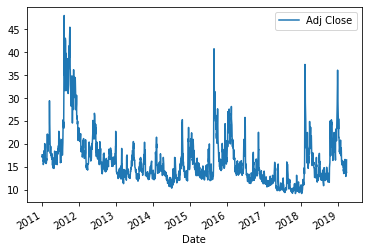

In [6]:
series.plot()
plt.show();

In [7]:
series.shape

(2068, 1)

the adj close are quite erratic.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [9]:
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

In [10]:
np.random.seed(2019)

In [17]:
path_to_dataset = '/content/drive/My Drive/Data/Time_series/vix_2011_2019.csv'
sequence_length = 20

In [18]:
# vector to store the time series
vector_vix = []
with open(path_to_dataset) as f:
    next(f) # skip the header row
    for line in f:
        fields = line.split(',')
        vector_vix.append(float(fields[6]))

In [20]:
# convert the vector to a 2D matrix
matrix_vix = convertSeriesToMatrix(vector_vix, sequence_length)

# shift all data by mean
matrix_vix = np.array(matrix_vix)
shifted_value = matrix_vix.mean()
matrix_vix -= shifted_value
print("Data shape: ", matrix_vix.shape)

Data shape:  (2049, 20)


In [21]:
matrix_vix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# split dataset: 90% for training and 10% for testing
train_row = int(round(0.9 * matrix_vix.shape[0]))
train_set = matrix_vix[:train_row, :]

# shuffle the training set (but do not shuffle the test set)
np.random.shuffle(train_set)

In [ ]:
# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_vix[train_row:, :-1]
y_test = matrix_vix[train_row:, -1]

In [ ]:
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1793, 19, 1)
(199, 19, 1)


In [ ]:
model = Sequential()
# layer 1: LSTM
model.add(LSTM( input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 2: LSTM
model.add(LSTM(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=100)`
  
C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # Remove the CWD f

In [ ]:
model.fit(X_train, y_train, batch_size=512, epochs=50, validation_split=0.05, verbose=1)

# evaluate the result
test_mse = model.evaluate(X_test, y_test, verbose=1)
print('The mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))

Train on 1703 samples, validate on 90 samples
Epoch 1/50
1703/1703 [==============================] - 689s 404ms/step - loss: 26.8567 - val_loss: 23.8590
Epoch 2/50
1703/1703 [==============================] - 690s 405ms/step - loss: 16.9654 - val_loss: 17.0576
Epoch 3/50
1703/1703 [==============================] - 702s 412ms/step - loss: 13.0254 - val_loss: 13.1334
Epoch 4/50
1703/1703 [==============================] - 690s 405ms/step - loss: 10.7345 - val_loss: 10.5180
Epoch 5/50
1703/1703 [==============================] - 707s 415ms/step - loss: 9.2058 - val_loss: 9.2851
Epoch 6/50
1703/1703 [==============================] - 693s 407ms/step - loss: 8.2236 - val_loss: 8.6320
Epoch 7/50
1703/1703 [==============================] - 719s 422ms/step - loss: 7.6380 - val_loss: 8.0869
Epoch 8/50
1703/1703 [==============================] - 685s 402ms/step - loss: 7.5873 - val_loss: 7.5897
Epoch 9/50
1703/1703 [==============================] - 686s 403ms/step - loss: 6.5518 - val_loss:

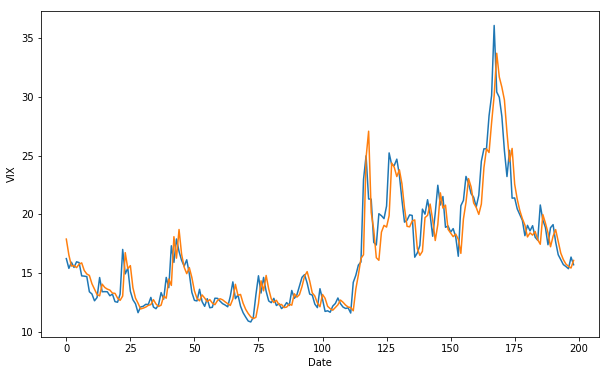

In [ ]:
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

# plot the results
fig = plt.figure(figsize=(10,6))
plt.plot(y_test + shifted_value)
plt.plot(predicted_values + shifted_value)
plt.xlabel('Date')
plt.ylabel('VIX')
plt.show();